In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go

In [15]:
# Import the CSV file
data_battles = pd.read_csv('dataset/Battles.csv',encoding='iso-8859-1', delimiter=';')
data_deaths = pd.read_csv('dataset/Character_Deaths.csv',encoding='iso-8859-1', )
data_predictions = pd.read_csv('dataset/Character_Predictions.csv',encoding='iso-8859-1')
data_screentimes = pd.read_csv('dataset/Screentimes.csv',encoding='iso-8859-1')

In [16]:
# Checking database size for each file data_***
print(f'O dataset possui {data_deaths.shape[0]} linhas e {data_deaths.shape[1]} colunas.')

O dataset possui 917 linhas e 13 colunas.


In [17]:
# checking the type of variables
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         664 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


### Pick the show's most important characters based on screen time and popularity

In [18]:
ch_predictions = data_predictions.sort_values('name')
# Taking only characters with popularity.
ch_predictions = ch_predictions[ch_predictions['popularity'] > 0]
screentimes = data_screentimes.sort_values('name')
# Creating a dataframe with characters in both bases used.
matching = ch_predictions[ch_predictions['name'].isin(screentimes['name'])]
ch_predictions = ch_predictions[ch_predictions['name'].isin(matching['name'])]
screentimes = screentimes[screentimes['name'].isin(matching['name'])]
matching['screentime'] = list(screentimes['screentime'])
# Multiplying character popularity with screen time to get the importance of each one.
matching['popularity_by_time'] = matching['screentime'] * matching['popularity'] / max(matching['screentime'])
# Sorting by popularity.
df_popularity = matching.sort_values(by='popularity_by_time', ascending=False)
# Renaming columns
df_popularity = df_popularity.rename(columns = {'name': 'Personagens'})
df_popularity = df_popularity.rename(columns = {'popularity_by_time': 'Nivel de importância'})

In [19]:
fig = px.bar(df_popularity.head(15), x='Personagens', y='Nivel de importância',
             title="Importância de Personagens",
             color='Personagens',
             color_discrete_sequence=px.colors.sequential.Tealgrn,
             template='plotly_white')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True
fig.show()

### Displays the most popular characters who are no longer alive.

In [20]:
ch_predictions = data_predictions.sort_values('name')
# Taking only characters with popularity.
ch_predictions = ch_predictions[ch_predictions['popularity'] > 0]
# Filtering dead characters.
ch_predictions = ch_predictions[ch_predictions['isAlive'] == 0]
# Sort by popularity.
df_isAlive = ch_predictions.sort_values(by='popularity', ascending=False)
# Renaming columns
df_isAlive = df_isAlive.rename(columns = {'name': 'Personagem (morto)'})
df_isAlive = df_isAlive.rename(columns = {'popularity': 'Popularidade'})

In [21]:
fig = px.bar(df_isAlive.head(15), x='Personagem (morto)', y='Popularidade',
             title="Popularidade",
             color='Personagem (morto)',
             color_discrete_sequence=px.colors.sequential.Tealgrn,
             template='plotly_white')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True
fig.show()

### Analysis of the families that most participated in wars

In [22]:
battles = data_battles
attacker = 'attacker_'
defender = 'defender_'
families_battling = []
# Performs a loop to pick up attacking and defending families in wars.
for i in range(1, 5):
    att = attacker + str(i)
    defe = defender + str(i)
    for family in battles[att]:
        families_battling.append(family)
    for family in battles[defe]:
        families_battling.append(family)
# Filter only values that are non-null.
family_list_battle = [family for family in families_battling if str(family) != 'nan']
# It counts how many times each family fought in a war.
family_battle_ocurrences = Counter(family_list_battle)
df = pd.DataFrame.from_dict(family_battle_ocurrences, orient='index').reset_index()
# Sort the data by participation in wars.
df_families_battling = df.sort_values(by=0, ascending=False).head(5)

In [23]:
values = df_families_battling[0]
names = df_families_battling['index']

In [24]:
fig = px.pie(df_families_battling, values=values, names=names,
             title='Participação de Famílias em Guerras',
             color_discrete_sequence=['#1e3d59', '#ff6e40'],
             template='plotly_white')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True
fig.show()

### It analyzes how many deaths of nobles and non-nobles had per book.

In [25]:
# Filter already dead characters.
deaths = data_deaths[data_deaths['Book of Death'] > 0]
# Load the amount of characters killed per book that are noble and non-noble.
deaths_noble = list(
    map(lambda x: len(deaths[(deaths['Book of Death'] == x) & (deaths['Nobility'] == 1)]), range(1, 6)))
deaths_non_noble = list(
    map(lambda x: len(deaths[(deaths['Book of Death'] == x) & (deaths['Nobility'] == 0)]), range(1, 6)))
indice = np.arange(5)

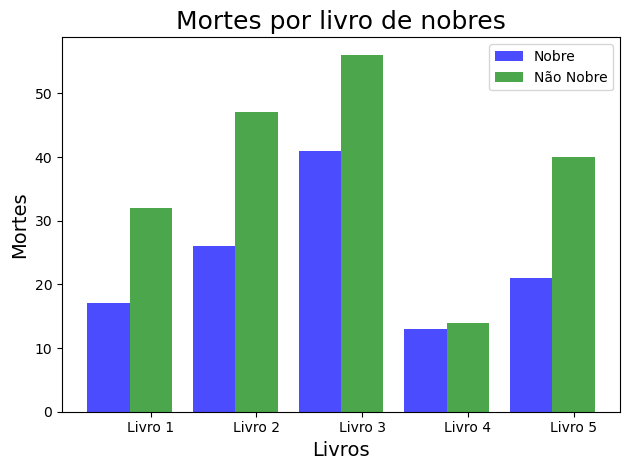

In [26]:
# chart settings
bar_larg = 0.4
transp = 0.7
plt.bar(indice, deaths_noble, bar_larg, alpha=transp, color='blue', label='Nobre')
plt.bar(indice + bar_larg, deaths_non_noble, bar_larg, alpha=transp, color='green', label='Não Nobre')
plt.xlabel('Livros', fontsize=14, color='k')
plt.ylabel('Mortes', fontsize=14, color='k')
plt.title('Mortes por livro de nobres', fontsize=18, color='k')
plt.xticks(indice + bar_larg, ('Livro 1', 'Livro 2', 'Livro 3', 'Livro 4', 'Livro 5'))
plt.legend()
plt.tight_layout()
plt.show()
